In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Implementation of linear regression algorithm with only one input feature

In [24]:
class linear_regression:
  def __init__(self, learning_rate = 10e-4, repeat = 1000):
    self.learning_rate = learning_rate
    self.repeat = repeat
    self.n = 1
    self.m = None
    self.x_train = None
    self.y_train = None
    self.costs = []
  
  def fit(self, x_train, y_train):
    self.m = x_train.shape[0]
    self.x_train = x_train.reshape(self.m , 1)
    self.y_train = y_train.reshape(self.m , 1)

    self.w = np.zeros((1, 1))
    self.b = 0 
    for _ in range(0 , self.repeat):
      y_predict = np.dot(self.x_train, self.w) + self.b
      self.y_train = self.y_train.reshape((self.m, 1))
      cost = np.sum((y_predict - self.y_train) ** 2) / self.m
      self.costs.append(cost)
      dw = np.dot(self.x_train.T, (y_predict - self.y_train)) / self.m
      db = np.sum((y_predict - self.y_train)) / self.m
      temp_w = self.w - (self.learning_rate * dw)
      temp_b = self.b - (self.learning_rate * db)
      self.w = temp_w
      self.b = temp_b
  
  def get_parameter(self):
    return self.w, self.b

  def predict(self, x):
    return x * self.w + self.b
    
  def plot_costs(self):
    plt.plot(self.costs)

#load data (boston data sets)

In [25]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
X, y = boston.data, boston.target
X = np.array(X["RM"])
y = np.array(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

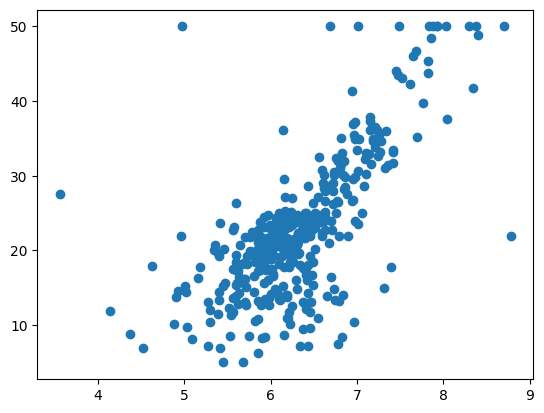

In [26]:
plt.scatter(X_train, y_train)

In [23]:
model = linear_regression()
model.fit(X_train, y_train)
y_preidct = model.predict(X_test)

#plot for predicts data

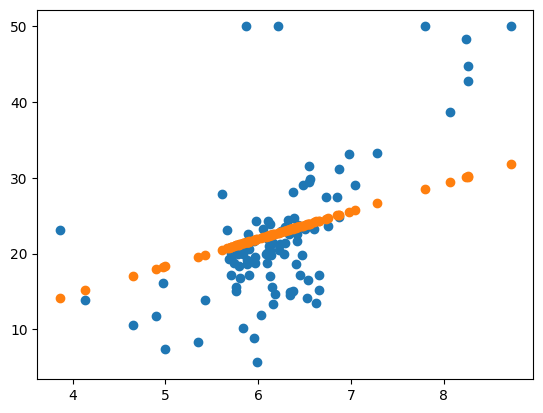

In [33]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_preidct)
plt.show()

#plot of cost founction of data

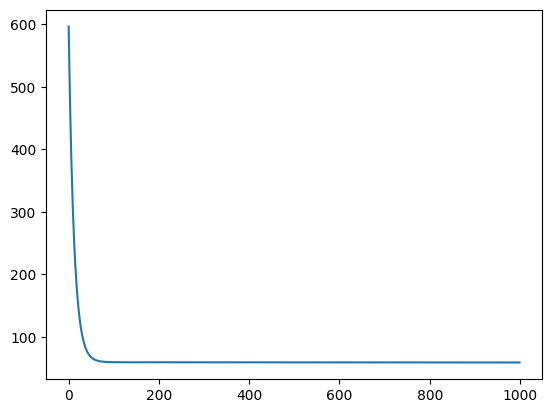

In [28]:
model.plot_costs()